<a href="https://colab.research.google.com/github/Dm697/EE559_Final_Project/blob/main/ee559_News_Shares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!ls "/content/drive/My Drive/EE559_Final_Project"

Mounted at /content/drive
NEWS_Test_data.csv   NEWS_Training_data.csv
NEWS_Test_label.csv  NEWS_Training_label.csv


In [ ]:
train_X = pd.read_csv("/content/drive/My Drive/EE559_Final_Project/NEWS_Training_data.csv")
train_y = pd.read_csv("/content/drive/My Drive/EE559_Final_Project/NEWS_Training_label.csv").to_numpy()
test_X = pd.read_csv("/content/drive/My Drive/EE559_Final_Project/NEWS_Test_data.csv")
test_y = pd.read_csv("/content/drive/My Drive/EE559_Final_Project/NEWS_Test_label.csv").to_numpy()

Define the metric calculation functions

In [ ]:
def PMSE(y, y_pred):
    y = y.reshape(y.shape[0],1)
    y_pred = y_pred.reshape(y.shape[0],1)
    return 1/y.shape[0]*np.power(np.divide(np.subtract(y, y_pred), np.add(y,10)),2).sum()
    
def PMAE(y, y_pred):
    y = y.reshape(y.shape[0],1)
    y_pred = y_pred.reshape(y.shape[0],1)
    return 1/y.shape[0]*np.abs(np.divide(np.subtract(y,y_pred),np.add(y,10))).sum()

def modifiedR2(y, y_pred):
    y = y.reshape(y.shape[0],1)
    y_pred = y_pred.reshape(y.shape[0],1)
    y_mean = y.sum()/y.shape[0]
    y_mean = np.repeat(y_mean, repeats = y.shape[0]).reshape(y.shape[0],y.shape[1])
    pmse = PMSE(y, y_pred)
    pmae = PMSE(y, y_mean)
    return (1 - pmse/pmae)

def print_metrics(y,y_pred):
    y = y.reshape(y.shape[0],1)
    y_pred = y_pred.reshape(y.shape[0],1)
    print('mean_absolute_error:', mean_absolute_error(y, y_pred))
    print('r2_score:',r2_score(y,y_pred))
    print('PMSE:', PMSE(y, y_pred))
    print('PMAE:', PMAE(y, y_pred))
    print('modifiedR2:', modifiedR2(y, y_pred))

Trivial System and Baseline Performance

In [ ]:
# trivial system output mean of output
y_mean = train_y.sum()/train_y.shape[0]
y_mean = np.repeat(y_mean, repeats = train_y.shape[0]).reshape(train_y.shape[0],1)
print("trivial system metrics")
print_metrics(train_y, y_mean)
# baseline system accuracy using linear regression
reg = LinearRegression().fit(train_X, train_y)
base_pred = reg.predict(train_X)
print("Baseline metrics")
print_metrics(train_y, base_pred)

trivial system metrics
mean_absolute_error: 3219.7423121350107
r2_score: 0.0
PMSE: 18.62584095707017
PMAE: 1.9126351176555
modifiedR2: 0.0
Baseline metrics
mean_absolute_error: 3070.9264580733466
r2_score: 0.023223176348493135
PMSE: 26.141994095580547
PMAE: 1.655254669345867
modifiedR2: -0.40353362598950593


In [ ]:
print_metrics(test_y, reg.predict(test_X))

mean_absolute_error: 2801.0518671012237
r2_score: 0.044498700422134774
PMSE: 6.814368200854747
PMAE: 1.5730983197320147
modifiedR2: 0.217480058603865


In [ ]:
train_X.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDAT_00',
       'LDAT_01', 'LDAT_02', 'LDAT_03', 'LDAT_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_

# Feature Exploration

Understand the output

In [ ]:
# the mean of the output
y_mean = train_y.sum()/train_y.shape[0]
print(y_mean)

3404.088822803277


(array([1.10344646e-04, 4.99691443e-06, 1.54032715e-06, 6.22119173e-07,
        2.86108283e-07, 2.02937270e-07, 1.63015184e-07, 6.98636505e-08,
        7.31904910e-08, 3.99220860e-08, 2.66147240e-08, 4.99026075e-08,
        3.32684050e-08, 2.32878835e-08, 6.65368100e-09, 1.33073620e-08,
        9.98052150e-09, 9.98052150e-09, 3.32684050e-09, 3.32684050e-09,
        0.00000000e+00, 3.32684050e-09, 3.32684050e-09, 6.65368100e-09,
        9.98052150e-09, 3.32684050e-09, 3.32684050e-09, 3.32684050e-09,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.32684050e-09, 0.00000000e+00, 3.32684050e-09,
        3.32684050e-09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.32684050e-09, 0.00000000e+00, 0.00000000e+00, 0.000000

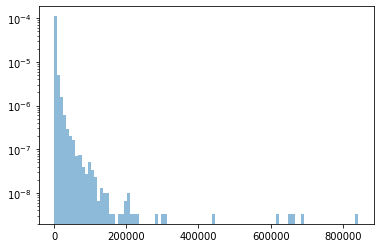

In [ ]:
plt.hist(train_y, log = True, bins = 100, density=True,alpha=0.5)

In [ ]:
# get the shares by channel
def count_shares_based_on_channels(train_X, train_y):
  res = [0,0,0,0,0,0,0]
  for i in range(train_X.shape[0]):
    temp = train_X.iloc[i,11:17].to_numpy()
    if np.where(temp==1)[0].shape[0] == 0:
      res[6] += train_y[i][0]
    else:
      index = np.where(temp==1)[0][0]
      res[index] += train_y[i][0]
  return res
shares_based_on_channels = count_shares_based_on_channels(train_X, train_y)

In [ ]:
shares_based_on_channels

[6668391, 18773384, 17028513, 7586046, 20256350, 17355575, 33667083]

<BarContainer object of 7 artists>

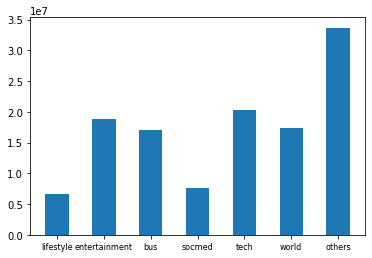

In [ ]:
plt.tick_params(axis='x', labelsize=8)
plt.bar(['lifestyle','entertainment', 'bus', 'socmed', 'tech', 'world', 'others'],shares_based_on_channels, width = 0.5)

In [ ]:
# get the shares by day of week
def count_shares_based_on_day(train_X,train_y):
  res = [0,0,0,0,0,0,0]
  for i in range(train_X.shape[0]):
    temp = train_X.iloc[i,29:36].to_numpy()
    index = np.where(temp==1)[0][0]
    res[index] += train_y[i][0]
  return res
shares_based_on_days = count_shares_based_on_day(train_X,train_y)

# get the shares by workday and weekend
def count_shares_based_on_weekends(train_X,train_y):
  res = [0,0]
  for i in range(train_X.shape[0]):
    temp = int(train_X.iloc[i,36])
    res[temp] += train_y[i][0]
  return res
shares_based_on_weekends = count_shares_based_on_weekends(train_X,train_y)

In [ ]:
shares_based_on_days

[21896215, 20798207, 22351436, 21104737, 16760011, 9017245, 9407491]

<BarContainer object of 7 artists>

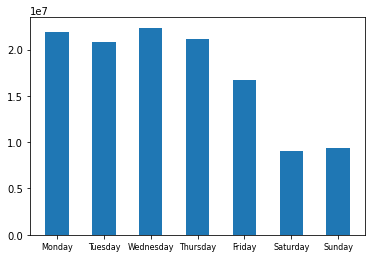

In [ ]:
plt.tick_params(axis='x', labelsize=8)
plt.bar(['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],shares_based_on_days, width = 0.5)

In [ ]:
shares_based_on_weekends

[102910606, 18424736]

<BarContainer object of 2 artists>

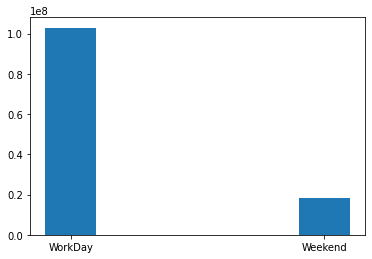

In [ ]:
plt.bar(['WorkDay','Weekend'],shares_based_on_weekends, width=0.2)

In [ ]:
# count number of each channels
def count_channels(train_X):
  count_channel = [0,0,0,0,0,0,0]
  for i in range(train_X.iloc[:,11:17].shape[1]):
    count_channel[i] = int(train_X.iloc[:,11+i].sum())
  count_channel[-1] = train_X.shape[0] - sum(count_channel)
  return count_channel
count_channel = count_channels(train_X)

# count number of each days
def count_days(train_X):
  count_day = [0,0,0,0,0,0,0]
  for i in range(train_X.iloc[:,29:36].shape[1]):
    count_day[i] = int(train_X.iloc[:,29+i].sum())
  return count_day
count_day = count_days(train_X)

#count number of weekends, workdays
def count_weekends(train_X):
  count_weekend = [0,0]
  count_weekend[1] = int(train_X.iloc[:,36].sum())
  count_weekend[0] = train_X.shape[0] - sum(count_weekend)
  return count_weekend
count_weekend = count_weekends(train_X)

print("number of each channel:", count_channel)
print("number of each day:",count_day)
print("number of workdays/weekends:",count_weekend)

number of each channel: [1886, 6355, 5648, 2066, 6610, 7545, 5534]
number of each day: [5984, 6598, 6667, 6580, 5131, 2209, 2475]
number of workdays/weekends: [30960, 4684]


In [ ]:
# average shares by channel
count_channel = np.array(count_channel)
shares_based_on_channels = np.array(shares_based_on_channels)
channel_importance_matrix = np.divide(shares_based_on_channels, count_channel)

# average shares by day
count_day = np.array(count_day)
shares_based_on_days = np.array(shares_based_on_days)
day_importance_matrix = np.divide(shares_based_on_days, count_day)

#average shares by weekend
count_weekend = np.array(count_weekend)
shares_based_on_weekends = np.array(shares_based_on_weekends)
weekend_importance_matrix = np.divide(shares_based_on_weekends, count_weekend)

print(channel_importance_matrix)
print(day_importance_matrix)
print(weekend_importance_matrix)


[3535.73223754 2954.11235248 3014.96334986 3671.85188771 3064.50075643
 2300.27501657 6083.67961691]
[3659.12683824 3152.19869657 3352.54777261 3207.40683891 3266.42194504
 4082.04843821 3801.00646465]
[3323.98598191 3933.54739539]


<BarContainer object of 7 artists>

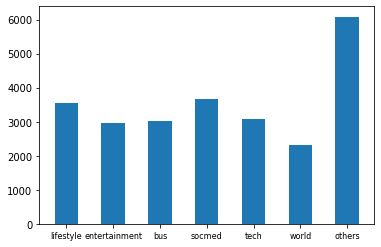

In [ ]:
plt.tick_params(axis='x', labelsize=8)
plt.bar(['lifestyle','entertainment', 'bus', 'socmed', 'tech', 'world', 'others'],channel_importance_matrix, width = 0.5)

<BarContainer object of 7 artists>

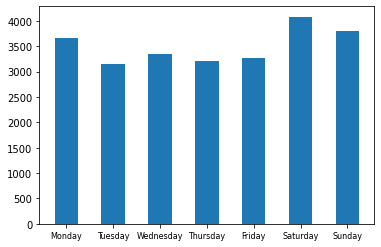

In [ ]:
plt.tick_params(axis='x', labelsize=8)
plt.bar(['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],day_importance_matrix, width = 0.5)

<BarContainer object of 2 artists>

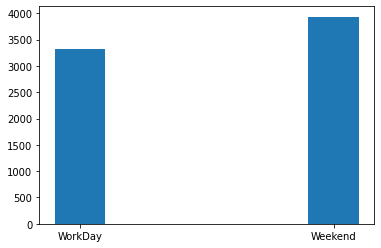

In [ ]:
plt.bar(['WorkDay','Weekend'],weekend_importance_matrix, width=0.2)

# Feature Engineering

In [ ]:
# make a deep copy of the original feature space
df_copy = train_X.copy(deep=True)

In [ ]:
# by exploring the statistic of each feature, except for the nomial feature, if the feature has max value - min value over 90,
# will perform a log scale on it
# get the column indexes that need to perform the log scale
threshold = 90
statistic_map = df_copy.describe()
log_mapping_index = []
for i in range(df_copy.shape[1]):
  if statistic_map.iloc[7,i] - statistic_map.iloc[3,i] >= threshold:
    log_mapping_index.append(i)
columns_do_maping = df_copy.columns[log_mapping_index]
print(columns_do_maping)

Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess'],
      dtype='object')


In [ ]:
# do feature mapping
# notice some feature has the min value of -1, therefore, simply add 1 to the original feature may fail to do the log scaling
# so here set n = 1.37
for column in columns_do_maping:
  if df_copy[column].min() <= -1:
    df_copy[column] = np.log(df_copy[column]-df_copy[column].min()+0.37)
  elif df_copy[column].min() == 0:
    df_copy[column] = np.log(df_copy[column]+1)
  else:
    df_copy[column] = np.log(df_copy[column])

In [ ]:
df_copy.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDAT_00,LDAT_01,LDAT_02,LDAT_03,LDAT_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000
mean,10.400123,5.887449,0.421105,0.672496,0.509270,2.156039,1.208145,1.117290,0.399401,4.547007,7.224049,0.052912,0.178291,0.158456,0.057962,0.185445,0.211677,0.568216,6.394445,5.279010,5.040902,13.372410,12.242585,4.391875,8.483698,7.977370,6.192357,6.913144,6.663652,0.167882,0.185108,0.187044,0.184603,0.143951,0.061974,0.069437,0.131411,0.580503,0.453678,0.272140,0.379643,0.261110,0.443377,0.119573,0.039627,0.016592,0.682256,0.287557,0.353961,0.095557,0.756550,-0.259260,-0.521110,-0.107374,0.282345,0.071067,0.342057,0.156419
std,2.120473,1.258377,0.103879,0.122916,0.112148,0.809499,0.692535,0.974371,0.679148,0.847785,1.910364,0.223861,0.382763,0.365173,0.233675,0.388664,0.408502,2.128224,1.309089,1.231891,4.521282,0.921808,0.932051,3.572326,0.573159,0.480198,3.077623,3.432979,3.280778,0.373767,0.388391,0.389952,0.387981,0.351045,0.241112,0.254199,0.337854,0.170689,0.343275,0.483794,0.575513,0.459134,0.116766,0.097019,0.017421,0.010830,0.190480,0.156101,0.104674,0.071457,0.247749,0.127391,0.290164,0.094935,0.324387,0.266088,0.188648,0.226684
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.994252,0.000000,-0.994252,0.000000,0.000000,0.000000,-0.994252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,9.000000,5.509388,0.385832,0.693147,0.485890,1.609438,0.693147,0.693147,0.000000,4.477716,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.994252,6.100319,4.961935,0.000000,13.645079,12.059894,0.314811,8.177816,7.776280,6.459904,7.003974,6.888572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.486804,0.163755,-0.034767,-0.095099,-0.070780,0.396180,0.058092,0.028409,0.009596,0.600000,0.185185,0.306626,0.050000,0.600000,-0.328162,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,10.000000,6.016157,0.431188,0.693147,0.524974,2.197225,1.386

In [ ]:
# since the output has a wide range, will use log to smooth the range
print("Max_Min range in original output:", train_y.max()-train_y.min())

train_y_deep_copy = np.log(train_y)
print("Max_Min range after log scale:", train_y_deep_copy.max()-train_y_deep_copy.min())

Max_Min range in original output: 843299
Max_Min range after log scale: 13.645078045562732


In [ ]:
col = list(range(0,11)) + list(range(17,29)) + list(range(37,58))
col = df_copy.columns[col]
# column do the standardization
print(col)

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDAT_00', 'LDAT_01', 'LDAT_02',
       'LDAT_03', 'LDAT_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      d

# Split Training set into training and validation

In [ ]:
# now we can split the train into the train set and validation set
from sklearn import model_selection
# Reserve 15% for testing
X_train, X_val, y_train, y_val = model_selection.train_test_split(df_copy, train_y, test_size=0.15, random_state= 2)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('validation data has ' + str(X_val.shape[0]) + ' observation with ' + str(X_val.shape[1]) + ' features')

y_train_deep_copy = np.log(y_train)

# since the output has a wide range, will use log to smooth the range
print("Max_Min range in training output:", y_train.max()-y_train.min())
print("Max_Min range after log scale:", y_train_deep_copy.max()-y_train_deep_copy.min())

training data has 30297 observation with 58 features
validation data has 5347 observation with 58 features
Max_Min range in training output: 843299
Max_Min range after log scale: 13.645078045562732


In [ ]:
# perform standardization on the non-nominal features, nominal features are columns: 11-16, 29-36
scaler = StandardScaler()
scaler.fit(X_train[col])
X_train[col] = scaler.transform(X_train[col])
X_val[col] = scaler.transform(X_val[col])

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train_deep_copy)
y_pred = np.exp(lr.predict(X_val))
print_metrics(y_val,y_pred)

mean_absolute_error: 2333.265076762285
r2_score: -0.004910598034634228
PMSE: 1.8435690271685998
PMAE: 0.733162161983918
modifiedR2: 0.8318880384377874


In [ ]:
ls = Lasso(max_iter = 10000)
ls.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
y_pred = np.exp(ls.predict(X_val))
print_metrics(y_val,y_pred)

mean_absolute_error: 2408.4855956646275
r2_score: -0.018308445969108522
PMSE: 2.587015770096676
PMAE: 0.8098070947689322
modifiedR2: 0.7640943792751425


In [ ]:
ridge = Ridge(max_iter = 10000)
ridge.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
y_pred = np.exp(ridge.predict(X_val))
print_metrics(y_val,y_pred)

mean_absolute_error: 2333.2881471997352
r2_score: -0.004921715635690216
PMSE: 1.8434915693759961
PMAE: 0.73316594253112
modifiedR2: 0.831895101683731


In [ ]:
svr = SVR(gamma = 500, C = 10)
svr.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
y_pred = np.exp(svr.predict(X_val))
print_metrics(y_val,y_pred)

mean_absolute_error: 2416.840301575719
r2_score: -0.017420756439355367
PMSE: 2.7153404632142277
PMAE: 0.8313877385825876
modifiedR2: 0.7523926661529641


In [ ]:
rf = RandomForestRegressor(n_estimators= 150, bootstrap= False, max_features = "log2", random_state=5, n_jobs=-1)
rf.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
y_pred = np.exp(rf.predict(X_val))
print_metrics(y_val,y_pred)

mean_absolute_error: 2316.8151425425376
r2_score: -0.00037284615258159626
PMSE: 1.8363677558046452
PMAE: 0.7381591981645004
modifiedR2: 0.8325447102720911


In [ ]:
xgb = GradientBoostingRegressor(n_estimators= 150, max_depth= 7, loss = 'huber', random_state=5)
xgb.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
y_pred = np.exp(xgb.predict(X_val))
print_metrics(y_val,y_pred)

mean_absolute_error: 2288.643311671479
r2_score: -0.0019588820560214604
PMSE: 1.3466540434470555
PMAE: 0.663959830764204
modifiedR2: 0.877200880762646


In [ ]:
sgd = SGDRegressor(max_iter=10000, loss = "huber", tol=1e-6, shuffle = True, random_state = 5)
sgd.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
y_pred = np.exp(sgd.predict(X_val))
print_metrics(y_val,y_pred)

mean_absolute_error: 2288.077224708748
r2_score: -0.018186823844980493
PMSE: 1.139812686660792
PMAE: 0.5808561204051653
modifiedR2: 0.8960623965014587


In [ ]:
y_pred = np.exp(sgd.predict(X_train))
print_metrics(y_train,y_pred)

mean_absolute_error: 2395.9047117668197
r2_score: -0.018083031543967953
PMSE: 3.7799362438068105
PMAE: 0.5931544029231682
modifiedR2: 0.8117377688991163


In [ ]:
knn = KNeighborsRegressor(weights = "distance")
knn.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
y_pred = np.exp(knn.predict(X_val))
print_metrics(y_val,y_pred)

mean_absolute_error: 2461.0469207109013
r2_score: -0.013355338226740399
PMSE: 2.5666416975725896
PMAE: 0.8150748764642732
modifiedR2: 0.7659522567110069


In [ ]:
mlp = MLPRegressor(hidden_layer_sizes= 125, max_iter=750, random_state=5, activation = "tanh", learning_rate = "adaptive")
mlp.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
y_pred = np.exp(mlp.predict(X_val))
print_metrics(y_val,y_pred)

mean_absolute_error: 2715.559785315619
r2_score: -0.010615862364206308
PMSE: 4.550812419572148
PMAE: 1.0592857530269477
modifiedR2: 0.5850190628712559


# Hyper parameter tuning and Model selection

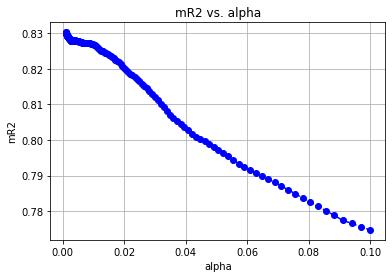

The optimaized alpha and score of Lasso linear is:  0.001 0.8303189889055047


In [ ]:
# Lasso Linear Regression
alphas = np.logspace (-3, -1,num=150)
mR2_score = np.empty_like(alphas)
optimal_alpha = float('-inf')
max_mR2 = float('-inf')
for i, alpha in enumerate(alphas):
  lasso = Lasso(max_iter=10000)
  lasso.set_params(alpha = alpha)
  lasso.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
  y_pred = np.exp(lasso.predict(X_val))
  mR2_score[i] = modifiedR2(y_val, y_pred)
  if mR2_score[i] > max_mR2:
    max_mR2 = mR2_score[i]
    optimal_alpha = alpha
plt.plot(alphas, mR2_score, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('mR2')
plt.grid(True)
plt.title('mR2 vs. alpha')
plt.show()
model_Lasso_para = optimal_alpha
print ('The optimaized alpha and score of Lasso linear is: ', model_Lasso_para, max_mR2)

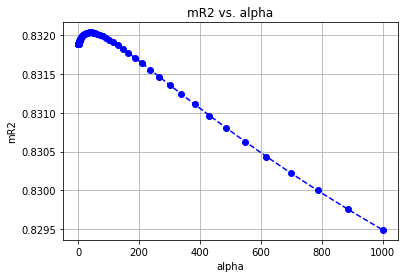

The optimaized alpha and score of Ridge linear is:  38.93690663537552 , 0.8320392460125885


In [ ]:
# Ridge Linear Regression
alphas = np.logspace (-10, 3, num=250)
mR2_score = np.empty_like(alphas)
optimal_alpha = float('-inf')
max_mR2 = float('-inf')
for i, alpha in enumerate(alphas):
  ridge = Ridge(max_iter=10000)
  ridge.set_params(alpha = alpha)
  ridge.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
  y_pred = np.exp(ridge.predict(X_val))
  mR2_score[i] = modifiedR2(y_val, y_pred)
  if mR2_score[i] > max_mR2:
    max_mR2 = mR2_score[i]
    optimal_alpha = alpha
plt.plot(alphas, mR2_score, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('mR2')
plt.grid(True)
plt.title('mR2 vs. alpha')
plt.show()
model_Ridge_para = optimal_alpha
print ('The optimaized alpha and score of Ridge linear is: ', model_Ridge_para,",", max_mR2)

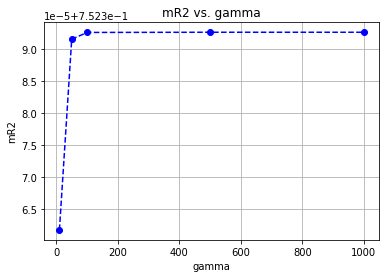

The optimaized C and score of SVR is:  500 , 0.7523926661529641


In [ ]:
# SVR
# first roughly approximate the range of C
C = np.array([10, 50, 100, 500, 1000])
mR2_score = []
optimal_C = float('-inf')
max_mR2 = float('-inf')
for i, c in enumerate(C):
  svr = SVR(C = 10)
  svr.set_params(gamma = c)
  svr.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
  y_pred = np.exp(svr.predict(X_val))
  mR2_score.append(modifiedR2(y_val, y_pred))
  if mR2_score[-1] > max_mR2:
    max_mR2 = mR2_score[-1]
    optimal_C = c
plt.plot(C, mR2_score, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('gamma')
plt.ylabel('mR2')
plt.grid(True)
plt.title('mR2 vs. gamma')
plt.show()
model_SVR_para = optimal_C
print ('The optimaized C and score of SVR is: ', model_SVR_para,",", max_mR2)

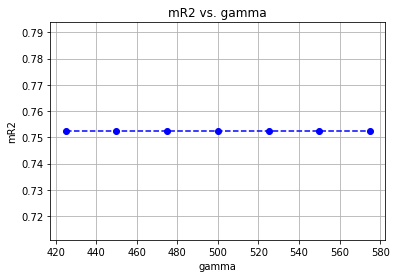

The optimaized C and score of SVR is:  425 , 0.7523926661529641


In [ ]:
# SVR
C = np.array([425,450,475, 500, 525,550,575])
mR2_score = []
optimal_C = float('-inf')
max_mR2 = float('-inf')
for i, c in enumerate(C):
  svr = SVR(C = 10)
  svr.set_params(gamma = c)
  svr.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
  y_pred = np.exp(svr.predict(X_val))
  mR2_score.append(modifiedR2(y_val, y_pred))
  if mR2_score[-1] > max_mR2:
    max_mR2 = mR2_score[-1]
    optimal_C = c
plt.plot(C, mR2_score, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('gamma')
plt.ylabel('mR2')
plt.grid(True)
plt.title('mR2 vs. gamma')
plt.show()
model_SVR_para = optimal_C
print ('The optimaized C and score of SVR is: ', model_SVR_para,",", max_mR2)

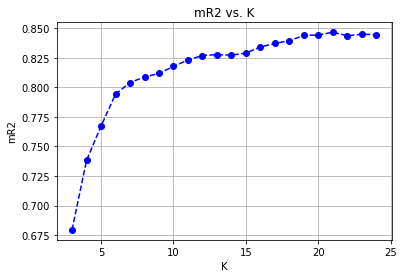

The optimaized K and score of KNN is:  21 , 0.8465964697612774


In [ ]:
# KNN Regressor
# K range(3,25)
K = np.array(list(range(3, 25)))
mR2_score = []
optimal_K = float('-inf')
max_mR2 = float('-inf')
for i, k in enumerate(K):
  knn = KNeighborsRegressor(weights = "distance")
  knn.set_params(n_neighbors= k)
  knn.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
  y_pred = np.exp(knn.predict(X_val))
  mR2_score.append(modifiedR2(y_val, y_pred))
  if mR2_score[-1] > max_mR2:
    max_mR2 = mR2_score[-1]
    optimal_K = k
plt.plot(K, mR2_score, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('K')
plt.ylabel('mR2')
plt.grid(True)
plt.title('mR2 vs. K')
plt.show()
model_KNN_para = optimal_K
print ('The optimaized K and score of KNN is: ', model_KNN_para,",", max_mR2)

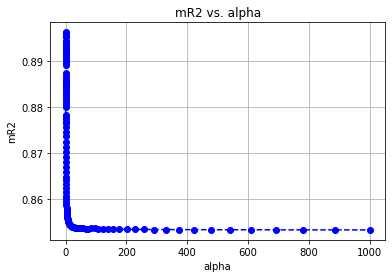

The optimaized alpha and score of SGD is:  0.0006691189901715636 , 0.8962339912237309


In [ ]:
# SGD
# Ridge Linear Regression
alphas = np.logspace (-5, 3, num=150)
# alphas= [1e-5, 0.1]
mR2_score = np.empty_like(alphas)
optimal_alpha = float('-inf')
max_mR2 = float('-inf')
for i, alpha in enumerate(alphas):
  sgd = SGDRegressor(max_iter=10000, loss = "huber", tol=1e-6, shuffle = True, random_state = 5)
  sgd.set_params(alpha = alpha)
  sgd.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
  y_pred = np.exp(sgd.predict(X_val))
  mR2_score[i] = modifiedR2(y_val, y_pred)
  if mR2_score[i] > max_mR2:
    max_mR2 = mR2_score[i]
    optimal_alpha = alpha
plt.plot(alphas, mR2_score, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('mR2')
plt.grid(True)
plt.title('mR2 vs. alpha')
plt.show()
model_SGD_para = optimal_alpha
print ('The optimaized alpha and score of SGD is: ', model_SGD_para,",", max_mR2)

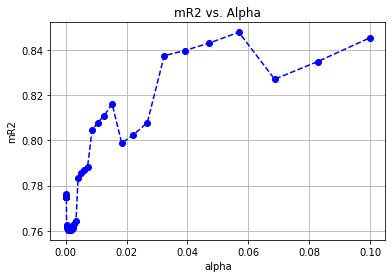

The optimaized C and score of MLP is:  0.05689866029018293 , 0.8477651112421964


In [ ]:
# MLP
alphas = np.logspace (-5, -1, num=50)
mR2_score = []
optimal_alpha = float('-inf')
max_mR2 = float('-inf')
for i, alpha in enumerate(alphas):
  mlp = MLPRegressor(hidden_layer_sizes= 75, max_iter=1000, random_state=5, activation = "tanh", learning_rate = "adaptive") 
  mlp.set_params(alpha = alpha)
  mlp.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))  
  y_pred = np.exp(mlp.predict(X_val))
  mR2_score.append(modifiedR2(y_val, y_pred))
  if mR2_score[-1] > max_mR2:
    max_mR2 = mR2_score[-1]
    optimal_alpha = alpha
plt.plot(alphas, mR2_score, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('mR2')
plt.grid(True)
plt.title('mR2 vs. Alpha')
plt.show()
model_MLP_para = optimal_alpha
print ('The optimaized C and score of MLP is: ', model_MLP_para,",", max_mR2)

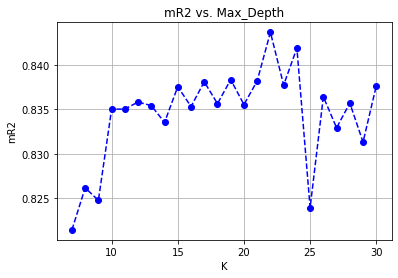

The optimaized max_depth and score of Random Forest is:  22 , 0.843682573277241


In [ ]:
# Random Forest Regressor
# max_depth: 7-30
K = np.array(list(range(7,31)))
mR2_score = []
optimal_K = float('-inf')
max_mR2 = float('-inf')
for i, k in enumerate(K):
  rf = RandomForestRegressor(n_estimators= 150, bootstrap= False, max_features = "log2", random_state=5, n_jobs=-1)
  rf.set_params(max_depth= k)
  rf.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
  y_pred = np.exp(rf.predict(X_val))
  mR2_score.append(modifiedR2(y_val, y_pred))
  if mR2_score[-1] > max_mR2:
    max_mR2 = mR2_score[-1]
    optimal_K = k
plt.plot(K, mR2_score, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('K')
plt.ylabel('mR2')
plt.grid(True)
plt.title('mR2 vs. Max_Depth')
plt.show()
model_RF_para = optimal_K
print ('The optimaized max_depth and score of Random Forest is: ', model_RF_para,",", max_mR2)

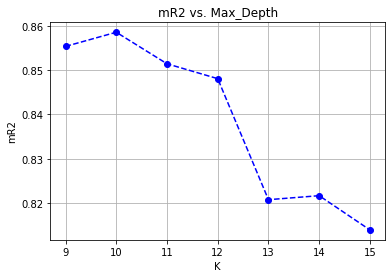

The optimaized max_depth and score of XGboost is:  10 , 0.858531369320657


In [ ]:
# Gradient Boosting Machine
# max_depth: 
K = np.array(list(range(9,16)))
mR2_score = []
optimal_K = float('-inf')
max_mR2 = float('-inf')
for i, k in enumerate(K):
  xgb = GradientBoostingRegressor(n_estimators= 150, loss = 'huber', random_state=5)
  xgb.set_params(max_depth= k)
  xgb.fit(X_train, y_train_deep_copy.reshape(y_train_deep_copy.shape[0],))
  y_pred = np.exp(xgb.predict(X_val))
  mR2_score.append(modifiedR2(y_val, y_pred))
  if mR2_score[-1] > max_mR2:
    max_mR2 = mR2_score[-1]
    optimal_K = k
plt.plot(K, mR2_score, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('K')
plt.ylabel('mR2')
plt.grid(True)
plt.title('mR2 vs. Max_Depth')
plt.show()
model_XGB_para = optimal_K
print ('The optimaized max_depth and score of XGboost is: ', model_XGB_para,",", max_mR2)

# Final test using candidate models and output the one that performs the best on the unknown test set.

In [ ]:
## do santadardization on the whole training set
df_copy = train_X.copy(deep=True)
# column do the standardization
col = list(range(0,11)) + list(range(17,29)) + list(range(37,58))
col = df_copy.columns[col]
threshold = 90
statistic_map = df_copy.describe()
log_mapping_index = []
for i in range(df_copy.shape[1]):
  if statistic_map.iloc[7,i] - statistic_map.iloc[3,i] >= threshold:
    log_mapping_index.append(i)
columns_do_maping = df_copy.columns[log_mapping_index]
for column in columns_do_maping:
  if df_copy[column].min() <= -1:
    df_copy[column] = np.log(df_copy[column]-df_copy[column].min()+0.37)
  elif df_copy[column].min() == 0:
    df_copy[column] = np.log(df_copy[column]+1)
  else:
    df_copy[column] = np.log(df_copy[column])
scaler = StandardScaler()
scaler.fit(df_copy[col])
df_copy[col] = scaler.transform(df_copy[col])
df_copy.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDAT_00,LDAT_01,LDAT_02,LDAT_03,LDAT_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,35644.000000,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04,3.564400e+04
mean,-2.958892e-16,2.266482e-16,-1.059016e-19,-2.923586e-17,2.553398e-16,-4.566604e-16,-4.585168e-16,-1.245788e-15,7.824823e-16,1.133646e-16,-1.848806e-15,0.052912,0.178291,0.158456,0.057962,0.185445,0.211677,1.237747e-15,-2.584280e-16,9.683148e-17,1.297694e-15,2.538142e-15,5.724700e-16,-1.561102e-15,-1.001149e-15,7.232518e-16,3.181519e-16,-1.572468e-16,4.691131e-17,0.167882,0.185108,0.187044,0.184603,0.143951,0.061974,0.069437,0.131411,-2.486138e-16,3.695111e-17,1.622787e-18,1.310689e-17,7.855410e-17,-3.406295e-16,-1.677856e-16,2.426653e-16,-6.348492e-17,2.655079e-16,-8.471431e-17,-2.967559e-16,-1.289499e-15,2.634708e-16,-2.978422e-16,1.149656e-16,3.908020e-16,3.088995e-16,-1.126879e-15,2.303610e-16,1.733672e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.223861,0.382763,0.365173,0.233675,0.388664,0.408502,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.373767,0.388391,0.389952,0.387981,0.351045,0.241112,0.254199,0.337854,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-3.961493e+00,-4.678671e+00,-4.053858e+00,-5.471241e+00,-4.541122e+00,-2.663460e+00,-1.744549e+00,-1.146694e+00,-5.880985e-01,-5.363474e+00,-3.258090e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.341757e-01,-4.884721e+00,-5.092457e+00,-1.114943e+00,-1.450693e+01,-1.313529e+01,-1.507758e+00,-1.480186e+01,-1.661289e+01,-2.012087e+00,-2.013773e+00,-2.031148e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.259657e+00,-4.234796e+00,-2.629545e+00,-2.397276e+00,-2.746753e+00,-3.797208e+00,-5.291003e+00,-2.274724e+00,-1.532073e+00,-3.581813e+00,-1.842147e+00,-3.381603e+00,-1.337291e+00,-3.053736e+00,-5.814768e+00,-1.650435e+00,-9.402624e+00,-8.704101e-01,-4.025296e+00,-1.813234e+00,-6.900426e-01
25%,-6.602974e-01,-3.00439

In [ ]:
# using training's mean and std to perform scaling on the testing and do log scaling
df_test_copy = test_X.copy(deep=True)
for column in columns_do_maping:
  if df_test_copy[column].min() <= -1:
    df_test_copy[column] = np.log(df_test_copy[column]-df_test_copy[column].min()+0.37)
  elif df_test_copy[column].min() == 0:
    df_test_copy[column] = np.log(df_test_copy[column]+1)
  else:
    df_test_copy[column] = np.log(df_test_copy[column])
df_test_copy[col] = scaler.transform(df_test_copy[col])

In [ ]:
mR2 = []
pMAE = []
pMSE = []
mR2_test = []
pMAE_test = []
pMSE_test = []

In [ ]:
# lasso
lasso = Lasso(max_iter=10000)
lasso.set_params(alpha = 0.001)
lasso.fit(df_copy, train_y_deep_copy.reshape(train_y_deep_copy.shape[0],))
y_pred = np.exp(lasso.predict(df_copy))
mR2.append(modifiedR2(train_y, y_pred))
pMAE.append(PMAE(train_y, y_pred))
pMSE.append(PMSE(train_y, y_pred))
print_metrics(train_y, y_pred)

mean_absolute_error: 2409.4486873941023
r2_score: -0.006694327383529153
PMSE: 4.713351500719558
PMAE: 0.730322542649943
modifiedR2: 0.7469455735403765


In [ ]:
y_pred = np.exp(lasso.predict(df_test_copy))
mR2_test.append(modifiedR2(test_y, y_pred))
pMAE_test.append(PMAE(test_y, y_pred))
pMSE_test.append(PMSE(test_y, y_pred))
print_metrics(test_y,y_pred)

mean_absolute_error: 2134.675516325412
r2_score: -0.010774884875702329
PMSE: 1.434416358003422
PMAE: 0.6944969465379827
modifiedR2: 0.8352804880338427


In [ ]:
# ridge
ridge = Ridge(max_iter=10000)
ridge.set_params(alpha = 38.93690663537552)
ridge.fit(df_copy, train_y_deep_copy.reshape(train_y_deep_copy.shape[0],))
y_pred = np.exp(ridge.predict(df_copy))
mR2.append(modifiedR2(train_y, y_pred))
pMAE.append(PMAE(train_y, y_pred))
pMSE.append(PMSE(train_y, y_pred))
print_metrics(train_y, y_pred)

mean_absolute_error: 2408.9842777092767
r2_score: -0.006417823505931786
PMSE: 4.729872502338948
PMAE: 0.7298333015800214
modifiedR2: 0.7460585799459681


In [ ]:
y_pred = np.exp(ridge.predict(df_test_copy))
mR2_test.append(modifiedR2(test_y, y_pred))
pMAE_test.append(PMAE(test_y, y_pred))
pMSE_test.append(PMSE(test_y, y_pred))
print_metrics(test_y,y_pred)

mean_absolute_error: 2134.3827587295564
r2_score: -0.009238732423772156
PMSE: 1.4183996376897652
PMAE: 0.6946217726401597
modifiedR2: 0.8371197492348487


In [ ]:
# svr
svr = SVR(C = 10)
svr.set_params(gamma = 425)
svr.fit(df_copy, train_y_deep_copy.reshape(train_y_deep_copy.shape[0],))
y_pred = np.exp(svr.predict(df_copy))
mR2.append(modifiedR2(train_y, y_pred))
pMAE.append(PMAE(train_y, y_pred))
pMSE.append(PMSE(train_y, y_pred))
print_metrics(train_y, y_pred)

mean_absolute_error: 322.79232048275713
r2_score: 0.9901744822059361
PMSE: 0.009565407774667785
PMAE: 0.09619092305886753
modifiedR2: 0.9994864442471771


In [ ]:
y_pred = np.exp(svr.predict(df_test_copy))
mR2_test.append(modifiedR2(test_y, y_pred))
pMAE_test.append(PMAE(test_y, y_pred))
pMSE_test.append(PMSE(test_y, y_pred))
print_metrics(test_y,y_pred)

mean_absolute_error: 2231.577950608775
r2_score: -0.044791364617817075
PMSE: 2.3286546377669146
PMAE: 0.7940579988088389
modifiedR2: 0.7325916890653725


In [ ]:
# KNN Reregssor
knn = KNeighborsRegressor(weights = "distance")
knn.set_params(n_neighbors= 21)
knn.fit(df_copy, train_y_deep_copy.reshape(train_y_deep_copy.shape[0],))
y_pred = np.exp(knn.predict(df_copy))
mR2.append(modifiedR2(train_y, y_pred))
pMAE.append(PMAE(train_y, y_pred))
pMSE.append(PMSE(train_y, y_pred))
print_metrics(train_y, y_pred)

mean_absolute_error: 1.23327552985463e-12
r2_score: 1.0
PMSE: 1.0249125272221086e-31
PMAE: 2.432146326710546e-16
modifiedR2: 1.0


In [ ]:
y_pred = np.exp(knn.predict(df_test_copy))
mR2_test.append(modifiedR2(test_y, y_pred))
pMAE_test.append(PMAE(test_y, y_pred))
pMSE_test.append(PMSE(test_y, y_pred))
print_metrics(test_y,y_pred)

mean_absolute_error: 2139.859402463073
r2_score: -0.02710447125167814
PMSE: 1.1107932051251312
PMAE: 0.6598381434391499
modifiedR2: 0.8724433713944729


In [ ]:
# MLP
mlp = MLPRegressor(hidden_layer_sizes= 75, max_iter=1000, random_state=5, activation = "tanh", learning_rate = "adaptive")  
mlp.set_params(alpha = 0.05689866029018293)
mlp.fit(df_copy, train_y_deep_copy.reshape(train_y_deep_copy.shape[0],))
y_pred = np.exp(mlp.predict(df_copy))
mR2.append(modifiedR2(train_y, y_pred))
pMAE.append(PMAE(train_y, y_pred))
pMSE.append(PMSE(train_y, y_pred))
print_metrics(train_y, y_pred)

mean_absolute_error: 2294.0268343913917
r2_score: 0.027333950937260987
PMSE: 2.3390421722196733
PMAE: 0.6677268579652652
modifiedR2: 0.8744195133196497


In [ ]:
y_pred = np.exp(mlp.predict(df_test_copy))
mR2_test.append(modifiedR2(test_y, y_pred))
pMAE_test.append(PMAE(test_y, y_pred))
pMSE_test.append(PMSE(test_y, y_pred))
print_metrics(test_y,y_pred)

mean_absolute_error: 2179.7358524153065
r2_score: 0.006226486691639943
PMSE: 1.61060037914098
PMAE: 0.7405001579324854
modifiedR2: 0.8150486036049672


In [ ]:
# XGboost
xgb = GradientBoostingRegressor(n_estimators= 150, loss = 'huber', random_state=5)
xgb.set_params(max_depth= 11)
xgb.fit(df_copy, train_y_deep_copy.reshape(train_y_deep_copy.shape[0],))
y_pred = np.exp(xgb.predict(df_copy))
mR2.append(modifiedR2(train_y, y_pred))
pMAE.append(PMAE(train_y, y_pred))
pMSE.append(PMSE(train_y, y_pred))
print_metrics(train_y, y_pred)

mean_absolute_error: 1133.9642533980652
r2_score: 0.3792018926749158
PMSE: 0.11641187695333462
PMAE: 0.19330539097489033
modifiedR2: 0.9937499800829586


In [ ]:
y_pred = np.exp(xgb.predict(df_test_copy))
mR2_test.append(modifiedR2(test_y, y_pred))
pMAE_test.append(PMAE(test_y, y_pred))
pMSE_test.append(PMSE(test_y, y_pred))
print_metrics(test_y,y_pred)

mean_absolute_error: 2109.8547552429322
r2_score: 0.018268778243936468
PMSE: 1.164958356299957
PMAE: 0.6685980127891241
modifiedR2: 0.8662233800946602


In [ ]:
# SGD
sgd = SGDRegressor(max_iter=10000, loss = "huber", tol=1e-6, shuffle = True, random_state = 5)
sgd.set_params(alpha = 0.0006691189901715636)
sgd.fit(df_copy, train_y_deep_copy.reshape(train_y_deep_copy.shape[0],))
y_pred = np.exp(sgd.predict(df_copy))
mR2.append(modifiedR2(train_y, y_pred))
pMAE.append(PMAE(train_y, y_pred))
pMSE.append(PMSE(train_y, y_pred))
print_metrics(train_y, y_pred)

mean_absolute_error: 2378.4410871449504
r2_score: -0.01836458152641618
PMSE: 3.171814275206881
PMAE: 0.5858394473281113
modifiedR2: 0.8297089359606663


In [ ]:
y_pred = np.exp(sgd.predict(df_test_copy))
mR2_test.append(modifiedR2(test_y, y_pred))
pMAE_test.append(PMAE(test_y, y_pred))
pMSE_test.append(PMSE(test_y, y_pred))
print_metrics(test_y,y_pred)

mean_absolute_error: 2108.6011932083893
r2_score: -0.041887493160640554
PMSE: 0.9782970637451303
PMAE: 0.5604676616304614
modifiedR2: 0.887658409638941


In [ ]:
# random forest
rf = RandomForestRegressor(n_estimators= 150, bootstrap= False, max_features = "log2", random_state=5, n_jobs=-1)
rf.set_params(max_depth= 22)
rf.fit(df_copy, train_y_deep_copy.reshape(train_y_deep_copy.shape[0],))
y_pred = np.exp(rf.predict(df_copy))
mR2.append(modifiedR2(train_y, y_pred))
pMAE.append(PMAE(train_y, y_pred))
pMSE.append(PMSE(train_y, y_pred))
print_metrics(train_y, y_pred)

mean_absolute_error: 507.13750741488695
r2_score: 0.9579039226737699
PMSE: 0.03126174398872842
PMAE: 0.1305207534786111
modifiedR2: 0.9983215928848108


In [ ]:
y_pred = np.exp(rf.predict(df_test_copy))
mR2_test.append(modifiedR2(test_y, y_pred))
pMAE_test.append(PMAE(test_y, y_pred))
pMSE_test.append(PMSE(test_y, y_pred))
print_metrics(test_y,y_pred)

mean_absolute_error: 2104.006179757229
r2_score: 0.00281563148315489
PMSE: 1.1099108852395412
PMAE: 0.6769435319008268
modifiedR2: 0.8725446915586927


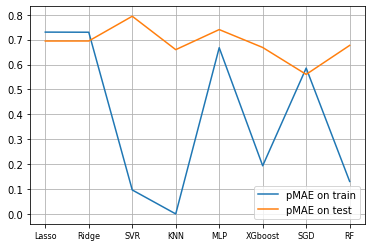

In [ ]:
plt.tick_params(axis='x', labelsize=8)
plt.plot(['Lasso','Ridge', 'SVR', 'KNN', 'MLP', 'XGboost', 'SGD','RF'],pMAE, label = 'pMAE on train')
plt.plot(['Lasso','Ridge', 'SVR', 'KNN', 'MLP', 'XGboost', 'SGD','RF'],pMAE_test, label = 'pMAE on test')
plt.grid(True)
plt.legend()
plt.show()

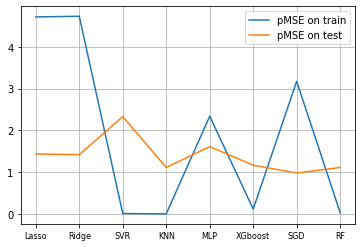

In [ ]:
plt.tick_params(axis='x', labelsize=8)
plt.plot(['Lasso','Ridge', 'SVR', 'KNN', 'MLP', 'XGboost', 'SGD','RF'],pMSE, label = 'pMSE on train')
plt.plot(['Lasso','Ridge', 'SVR', 'KNN', 'MLP', 'XGboost', 'SGD','RF'],pMSE_test, label = 'pMSE on test')
plt.grid(True)
plt.legend()
plt.show()

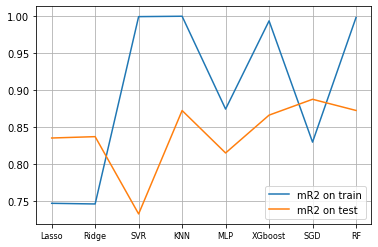

In [ ]:
plt.tick_params(axis='x', labelsize=8)
plt.plot(['Lasso','Ridge', 'SVR', 'KNN', 'MLP', 'XGboost', 'SGD','RF'],mR2, label = 'mR2 on train')
plt.plot(['Lasso','Ridge', 'SVR', 'KNN', 'MLP', 'XGboost', 'SGD','RF'],mR2_test, label = 'mR2 on test')
plt.grid(True)
plt.legend()
plt.show()